In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [ ]:
@njit()
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y
args = ()
@njit()
def myFun(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi = dpsi2 - dpsi1
    return np.array([dr,dphi])

def myFun2(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])


In [ ]:
# beta = 0.7
# alpha = 1.2
# eta1 = 0.1
# eta2 = 0.05

alpha = 0.5
beta = 0.8
eta1 = 0.1
eta2 = 0.05

args = beta,alpha,eta1,eta2
t = np.arange(0,6000,0.1)
y = np.linspace(0,0,1)
x = np.linspace(0,2*np.pi,5)
X,Y = np.meshgrid(x,y)
fx = 0.5
fy = 0.5
# u0s = [[1-1e-3,0],[0 + 1e-3,1],[fx,fy]]
u0s = [[1,0],[0,0],[0.2,0],[0.3,0],[0.6, 0],[0.9114966199929684-0.1,3.072208206306462+0.1]]
# u0s = [[x_,y_] for x_,y_ in zip(X.flatten(),Y.flatten()) ]
plt.figure(dpi=500)
for i,u0 in enumerate(u0s):

	u = RK4(myFun,np.array(u0,dtype=float),t,args=(args,))
	if i == 3:
		c = plt.scatter(u[0,0],u[0,1]%(np.pi*2),s=50,label=r'$\vec{x}^*(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	else:	
		c = plt.scatter(u[0,0],u[0,1]%(np.pi*2),s=50,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	plt.scatter(u[-1,0],u[-1,1]%(np.pi*2),s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.scatter(u[:,0],u[:,1]%(np.pi*2),s=1,alpha=0.8,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

plt.legend()
x = np.linspace(-0.1,1.2,30)
y = np.linspace(0,2*np.pi,30)
X,Y = np.meshgrid(x,y)

U,V = myFun2([X,Y],0,args)
M = (np.hypot(U,V))
# U = U / np.sqrt(U**2 + V**2);
# V = V / np.sqrt(U**2 + V**2);

# V = 0*V
xs = np.linspace(-3,-1e-5,1000)
U = U / np.sqrt(U**2 + V**2);
V = V / np.sqrt(U**2 + V**2);

# plt.axhline(0,color='black')
# plt.plot(xs,-np.log(-xs),color='black')
# plt.plot(x,xdot(x,y))
Q = plt.quiver(x,y,U,V,M,scale=20,pivot='mid',cmap='jet',zorder=3,alpha=0.7)
plt.colorbar()
plt.xlim(-0.1,1.1)
plt.ylim(0,2*np.pi)
# plt.legend()
ax =plt.gca()
xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1={eta1},\eta_2={eta2}$')
# plt.plot(-1,0,'o',ms=10,markeredgewidth=2,markerfacecolor='white')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
# plt.legend()

# qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')



## 1. dr = 0인 해를 dphi = 0인 해에 넣어서 풀기

$dr=0$이 되는 해는  r = 0,-1,1,$\frac{\beta \eta_1 \left(-\cos{\left(\alpha+\phi\right)}\pm\left|\sin(\alpha)\right|\right)}{\eta_2\cos{\left(\alpha+2\phi\right)}}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from parfor import parfor
from tqdm.notebook import tqdm

In [ ]:
def r0_p(phi,alpha,beta,eta1,eta2):
    r0 = beta*eta1*(-np.cos(alpha+phi)+np.sin(phi)) / (eta2*np.cos(alpha))
    return r0

def r0_m(phi,alpha,beta,eta1,eta2):
    r0 = beta*eta1*(-np.cos(alpha+phi)-np.sin(phi)) / (eta2*np.cos(alpha))
    return r0

def r0_1(phi,alpha,beta,eta1,eta2):
    return np.ones_like(phi)
def r0_M1(phi,alpha,beta,eta1,eta2):
    return -np.ones_like(phi)
def r0_0(phi,alpha,beta,eta1,eta2):
    return np.zeros_like(phi)

def phi0(phi,alpha,beta,eta1,eta2,r):
    # eta1 delta peak의 분포 차
    r0 = r(phi,alpha,beta,eta1,eta2)
    dpsi2 = - 1/2 * (1+r0**2)*(eta2*r0*np.sin(alpha)+2*beta*eta1*eta2*r0*np.sin(alpha+phi)+beta**2*eta1**2*np.sin(alpha+2*phi))
    dpsi1 = - 1/2 * (2)*(eta1*np.sin(alpha)+2*beta*eta1*eta2*r0*np.sin(alpha-phi)+beta**2*eta2**2*r0**2*np.sin(alpha-2*phi))
    dphi = dpsi2 - dpsi1
    return dphi    

def F_Jm(r,phi,alpha,beta,eta1,eta2):
    # beta = eta2*r*(-np.cos(alpha+phi) - np.sin(phi))/ (eta1 * np.cos(alpha+2*phi))
    drdr = -r**2*(beta**2*eta1**2*np.cos(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.cos(alpha + phi) + eta2**2*r**2*np.cos(alpha)) + r*(1 - r**2)*(2*beta*eta1*eta2*np.cos(alpha + phi) + 2*eta2**2*r*np.cos(alpha))/2 + (1 - r**2)*(beta**2*eta1**2*np.cos(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.cos(alpha + phi) + eta2**2*r**2*np.cos(alpha))/2
    drdphi = r*(1 - r**2)*(-2*beta**2*eta1**2*np.sin(alpha + 2*phi) - 2*beta*eta1*eta2*r*np.sin(alpha + phi))/2
    dphidr = 2*beta**2*eta2**2*r*np.sin(alpha - 2*phi) + 2*beta*eta1*eta2*np.sin(alpha - phi) - r*(beta**2*eta1**2*np.sin(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.sin(alpha + phi) + eta2**2*r**2*np.sin(alpha)) + (-r**2/2 - 1/2)*(2*beta*eta1*eta2*np.sin(alpha + phi) + 2*eta2**2*r*np.sin(alpha))
    dphidphi = -2*beta**2*eta2**2*r**2*np.cos(alpha - 2*phi) - 2*beta*eta1*eta2*r*np.cos(alpha - phi) + (-r**2/2 - 1/2)*(2*beta**2*eta1**2*np.cos(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.cos(alpha + phi))
    J = np.array([[drdr,drdphi],[dphidr,dphidphi]])
    D = np.linalg.det(J)
    tau = np.trace(J)
    discriminant = tau**2 - 4*D
    return np.linalg.det(J),np.trace(J),discriminant
def Linear_analysis(Det,Trace,Delta):
    D_sign = np.sign(Det)
    T_sign = np.sign(Trace)
    Delta_sign = np.sign(Delta)
    if Delta_sign == 1:
        C = 'node'
    elif Delta_sign == -1:
        C = 'spiral'
    else:
        C = 'Degenerate'
    if D_sign == -1:
        return 'Saddle'
    elif D_sign == 0:
        return 'Line/ need to analysis nonlinearity'
    
    if T_sign == 1:
        B = 'Stable'
    elif T_sign == -1:
        B = 'Unstable'
    else:
        return 'Center/ Need to analysis nonlinearity'
    return B + ' ' + C
    


In [ ]:
phis = np.linspace(0,2*np.pi,10000)
alpha = 0.7
beta = 0.8
eta1 = 0.1
eta2 = 1e-3
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]


In [ ]:
alphas = np.linspace(0,np.pi/2,50,endpoint=False)
betas = np.linspace(0,1,51)[1:]
AL,BE = np.meshgrid(alphas,betas)


In [ ]:
RR,PPhi,TT = [],[],[]
for beta in tqdm(betas):
    @parfor(alphas,args=(beta,eta1,eta2,r0_m,*Range[0]),bar=False)
    def get_R_phi(alpha,beta,eta1,eta2,R0,Pi,Pf):
        # for R_i,R_f in Range:
        try:
            rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,R0),bracket=[Pi,Pf])
            R,phi = R0(rot.root,alpha,beta,eta1,eta2),rot.root
            J_S = F_Jm(R,phi,alpha,beta,eta1,eta2)
            LA = Linear_analysis(*J_S)

            # print(R,',',phi,Linear_analysis(*J_S))
            return R,phi,LA
        except ValueError:
            return np.nan,np.nan,np.nan
        
    R,Phi,Type = zip(*get_R_phi)
    RR.append(R)
    PPhi.append(Phi)
    TT.append(Type)


In [ ]:
plt.pcolormesh(alphas,betas,np.array(RR))

In [ ]:


def get_R_phis(alphas,betas,eta1,eta2,R0,Pi,Pf):
    RR,PPhi,TT = [],[],[]
    for beta in tqdm(betas):
        @parfor(alphas,args=(beta,eta1,eta2,R0,Pi,Pf),bar=False)
        def get_R_phi(alpha,beta,eta1,eta2,R0,Pi,Pf):
            # for R_i,R_f in Range:
            try:
                rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,R0),bracket=[Pi,Pf])
                R,phi = R0(rot.root,alpha,beta,eta1,eta2),rot.root
                J_S = F_Jm(R,phi,alpha,beta,eta1,eta2)
                LA = Linear_analysis(*J_S)

                # print(R,',',phi,Linear_analysis(*J_S))
                return R,phi,LA
            except ValueError:
                return np.nan,np.nan,np.nan
            
        R,Phi,Type = zip(*get_R_phi)
        RR.append(R)
        PPhi.append(Phi)
        TT.append(Type)
    RR,PPhi,TT  = map(np.array,[RR,PPhi,TT])
    return RR,PPhi,TT

In [ ]:
RP = {}
PP = {}
TP = {}
for i in range(4):
    RP[i],PP[i],TP[i] = get_R_phis(alphas,betas,eta1,eta2,r0_p,*Range[i])

In [ ]:
RM = {}
PM = {}
TM = {}
for i in range(4):
    RM[i],PM[i],TM[i] = get_R_phis(alphas,betas,eta1,eta2,r0_m,*Range[i])

In [ ]:
R1 = {}
P1 = {}
T1 = {}
for i in range(4):
    R1[i],P1[i],T1[i] = get_R_phis(alphas,betas,eta1,eta2,r0_1,*Range[i])

In [ ]:
RM1 = {}
PM1 = {}
TM1 = {}
for i in range(4):
    RM1[i],PM1[i],TM1[i] = get_R_phis(alphas,betas,eta1,eta2,r0_M1,*Range[i])

In [ ]:
R0 = {}
P0 = {}
T0 = {}
for i in range(4):
    R0[i],P0[i],T0[i] = get_R_phis(alphas,betas,eta1,eta2,r0_0,*Range[i])

In [ ]:
np.where((TP[0]=='Stable node')|(TP[0]=='Stable spiral'),RM[i],np.nan)


In [ ]:
RR0 = np.array([RM1[i] for i in range(4)])

plt.imshow(np.nanmin(RR0,axis=0),origin='lower')

In [ ]:
RR0 = np.array([R0[i] for i in range(4)])

plt.imshow(np.nanmin(RR0,axis=0),origin='lower')

In [ ]:
R_NP = []
R_NM = []
for i in range(4):
    plt.figure()
    plt.subplot(131)
    R_N = np.where((TP[i]=='Stable node')|(TP[i]=='Stable spiral'),RP[i],np.nan)
    plt.pcolormesh(alphas,betas,RP[i],vmin=0,)
    plt.colorbar()
    R_NP.append(R_N)
    plt.subplot(132)
    R_N = np.where((TM[i]=='Stable node')|(TM[i]=='Stable spiral'),RM[i],np.nan)
    plt.pcolormesh(alphas,betas,RM[i],vmin=0,)
    plt.colorbar()
    R_NM.append(R_N)

    plt.subplot(133)
    R_N = np.where((T1[i]=='Stable node')|(T1[i]=='Stable spiral'),R1[i],np.nan)
    plt.pcolormesh(alphas,betas,R1[i],vmin=0,)
    plt.colorbar()

In [ ]:
R_NP = []
R_NM = []
for i in range(4):
    plt.figure(figsize=(20,5))
    plt.subplot(141)
    R_N = np.where((TP[i]=='Stable spiral'),RP[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    R_NP.append(R_N)
    plt.subplot(142)
    R_N = np.where((TM[i]=='Stable spiral'),RM[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    R_NM.append(R_N)

    plt.subplot(143)
    R_N = np.where((T1[i]=='Stable spiral'),R1[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    plt.subplot(144)
    R_N = np.where((T0[i]=='Stable spiral'),R0[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()

In [ ]:
R_NP = []
R_NM = []
for i in range(4):
    plt.figure(figsize=(20,5))
    plt.subplot(141)
    R_N = np.where((TP[i]=='Unstable node')|(TP[i]=='Unstable spiral'),RP[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,vmax=1)
    plt.colorbar()
    R_NP.append(R_N)
    plt.subplot(142)
    R_N = np.where((TM[i]=='Unstable node')|(TM[i]=='Unstable spiral'),RM[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    R_NM.append(R_N)

    plt.subplot(143)
    R_N = np.where((T1[i]=='Unstable node')|(T1[i]=='Unstable spiral'),R1[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    plt.subplot(144)
    R_N = np.where((T0[i]=='Unstable node')|(T0[i]=='Unstable spiral'),R0[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()

In [ ]:
R_NP = []
R_NM = []
for i in range(4):
    plt.figure(figsize=(20,5))
    plt.subplot(141)
    R_N = np.where((TP[i]=='Stable node')|(TP[i]=='Stable spiral'),RP[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    R_NP.append(R_N)
    plt.subplot(142)
    R_N = np.where((TM[i]=='Stable node')|(TM[i]=='Stable spiral'),RM[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    R_NM.append(R_N)

    plt.subplot(143)
    R_N = np.where((T1[i]=='Stable node')|(T1[i]=='Stable spiral'),R1[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    plt.subplot(144)
    R_N = np.where((T0[i]=='Stable node')|(T0[i]=='Stable spiral'),R0[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()

In [ ]:
R_SP = [np.where((TP[i]=='Saddle'),RP[i],np.nan) for i in range(4)]
R_SM = [np.where((TM[i]=='Saddle'),RM[i],np.nan) for i in range(4)]

In [ ]:
R_NP = [np.where(((TP[i]=='Stable node')|(TP[i]=='Stable spiral'))&(np.abs(RP[i])<1),RP[i],np.nan) for i in range(4)]
R_NM = [np.where(((TM[i]=='Stable node')|(TM[i]=='Stable spiral'))&(np.abs(RM[i])<1),RM[i],np.nan) for i in range(4)]
R_N1 = [np.where(((T1[i]=='Stable node')|(T1[i]=='Stable spiral')),R1[i],np.nan) for i in range(4)]

In [ ]:
R_UP = [np.where((TP[i]=='Unstable node')|(TP[i]=='Unstable spiral'),RP[i],np.nan) for i in range(4)]
R_UM = [np.where((TM[i]=='Unstable node')|(TM[i]=='Unstable spiral'),RM[i],np.nan) for i in range(4)]
R_U1 = [np.where((T1[i]=='Unstable node')|(T1[i]=='Unstable spiral'),R1[i],np.nan) for i in range(4)]

In [ ]:
AN = np.nanmin(np.array(R_NP),axis=0)
BN = np.nanmin(np.array(R_NM),axis=0)
CN = np.nanmin(np.array(R_N1),axis=0)
NNN = np.nanmin([AN,BN,CN],axis=0)

In [ ]:
np.where()

In [ ]:
AU = np.nanmin(np.array(R_UP),axis=0)
BU = np.nanmin(np.array(R_UM),axis=0)
# CU = np.nanmin(np.array(R_U1),axis=0)
UUU = np.nanmin([AU,BU],axis=0)

In [ ]:
AS,BS = np.nanmin(R_SP,axis=0),np.nanmin(R_SM,axis=0)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.pcolormesh(alphas,betas,np.nanmin([AS,BS],axis=0),vmin = 0 ,vmax=1)
plt.colorbar()
plt.ylabel(r'$\beta$',fontsize=15)
plt.title('Saddle')

plt.subplot(132)
AS,BS = np.nanmin(R_SP,axis=0),np.nanmin(R_SM,axis=0)
plt.pcolormesh(alphas,betas,NNN,vmin = 0 ,vmax=1)
plt.colorbar()
plt.title('Stable')
plt.xlabel(r'$\alpha$',fontsize=15)
plt.subplot(133)
plt.pcolormesh(alphas,betas,UUU,vmin = 1 ,vmax=1)
plt.colorbar()
plt.title('Unstable')

plt.suptitle(rf'$\eta_1 = {eta1},\eta_2 = {eta2}$')

In [ ]:
plt.imshow(np.nanmin([A,B,C],axis=0),origin='lower')

In [ ]:
plt.subplot(121)
plt.imshow(np.nanmin(np.array(R_NP),axis=0),origin='lower',vmin=0,)

plt.subplot(122)
plt.imshow(np.nanmin(np.array(R_NM),axis=0),origin='lower',vmin=0,)
plt.title('Stable fixed point')

In [ ]:
plt.subplot(121)
plt.imshow(np.nanmin(np.array(R_UP),axis=0),origin='lower',vmin=0,vmax=1)
plt.subplot(122)
plt.imshow(np.nanmin(np.array(R_UM),axis=0),origin='lower',vmin=0,vmax=1)


In [ ]:
plt.imshow(np.nanmin(np.array(R_NP),axis=0),origin='lower',vmin=0.8)
plt.colorbar()

In [ ]:
plt.imshow(np.nanmax(np.array(R_NM),axis=0))

In [ ]:
plt.imshow(RR1,vmax=1)

In [ ]:
V_R_Phi(alpha,beta,eta1,eta2,r0_m,*Range[0])

In [ ]:
get_R_phi(alpha,beta,eta1,eta2,r0_m)

In [ ]:
for i in F:
    print(i)

In [ ]:
print('1')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_1),bracket=[R_i,R_f])
        J_S = F_Jm(r0_1(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,eta1,eta2)
        print(r0_1(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('0')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_0),bracket=[R_i,R_f])
        r0_0(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_0(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,eta1,eta2)
        print(r0_0(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('Plus')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_p),bracket=[R_i,R_f])
        r0_p(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_p(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,eta1,eta2)
        print(r0_p(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('Minus')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_m),bracket=[R_i,R_f])
        r0_m(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_m(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,eta1,eta2)
        print(r0_m(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

In [ ]:
PP = np.linspace(0,2*np.pi,1000)
def RRR(phi,alpha):
    n = np.sin(2*alpha+phi)
    d = np.sin(2*alpha-phi) + 2*np.sin(phi)
    A = n/d
    return np.sqrt(A)

In [ ]:
np.nanmax(RRR(PP,1.5))

## scipy

In [ ]:
import sympy as sp

In [ ]:
alpha,phi = sp.symbols("alpha phi")

In [ ]:
AAA = sp.cos(alpha +  phi) **2  - sp.cos(alpha)* sp.cos(alpha+2*phi)

In [ ]:
cos(alpha +  phi) **2  - cos(alpha)* cos(alpha+2*phi)

In [ ]:
AAA.simplify()

In [ ]:
(sp.cos(alpha)* sp.cos(alpha+2*phi)).simplify()

In [ ]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)
Ap,Am= sp.symbols('A_+ A_-',real=True)
beta_rp = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)+sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))
beta_rm = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)-sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))

# beta_rp = -eta2*r*(Ap)/(eta1*sp.cos(alpha + 2*phi))
# beta_rm = -eta2*r*(Am)/(eta1*sp.cos(alpha + 2*phi))


beta_rp = -eta2*r*(sp.cos(alpha + phi) + sp.sin(phi))/(eta1*sp.cos(alpha + 2*phi))
beta_rm = -eta2*r*(sp.cos(alpha + phi) - sp.sin(phi))/(eta1*sp.cos(alpha + 2*phi))

dr = sp.Rational(1,2) * r* (1-r**2)*(eta2**2 * r**2 * sp.cos(alpha) + 2 * beta*eta1*eta2*r*sp.cos(alpha+phi) + beta **2 *eta1**2 * sp.cos(alpha + 2*phi))
dpsi2 = - sp.Rational(1,2) * (1+r**2)*(eta2**2 * r**2 * sp.sin(alpha) + 2 * beta*eta1*eta2*r*sp.sin(alpha+phi) + beta**2 * eta1**2 * sp.sin(alpha+2*phi))
dpsi1 = - sp.Rational(1,2) * (2)*(eta1**2 *sp.sin(alpha) + 2 * beta*eta1*eta2*r *sp.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1
sol_rs =  sp.solve(dr,r)

In [ ]:
sp.print_latex(beta_rp)

In [ ]:
dphi_r0 = sp.solve(dphi.subs(beta,beta_rm),r)

In [ ]:
SIM = dphi.subs(beta,beta_rm).simplify()

In [ ]:
n,_ = sp.fraction(SIM)

In [ ]:
sp.print_latex(sp.collect((n*-2).expand(),r))

In [ ]:
sp.print_latex(sp.collect(n*-2,r))

In [ ]:
sp.print_latex(n*-2)#(1/eta1**2*1/eta2**2)

In [ ]:
sol_phi0_r = sp.solve(n.simplify(),r)

In [ ]:
sol_phi0_r

In [ ]:
sp.print_latex(n.simplify())

In [ ]:
sp.solve(dphi.subs(beta,beta_rp),r)[0]

In [ ]:
dphi0_r2 = dphi_r0[2]#.simplify()
# dphi0_r1 = sp.solve(dphi.subs(beta,beta_rp),r)[1].simplify()

In [ ]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)

F_PHIr0 = sp.lambdify((phi,(alpha,eta1,eta2)),sol_phi0_r[1])
F_PHIr1 = sp.lambdify((phi,(alpha,eta1,eta2)),sol_phi0_r[3])

In [ ]:
# dphi0_r2.series(phi, x0=1, n=4)

In [ ]:
dphi0_r1 = sp.solve(dphi.subs(beta,beta_rp),r)[0].simplify()

In [ ]:
print(dphi0_r0)

In [ ]:
print(sol_beta[0])

In [ ]:
alpha,phi,B = sp.symbols('alpha phi B',real = True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# alpha,phi,B = np.symbols('alpha phi B',real = True)
eta1 = 0.1
eta2 = 0.05
alpha = 0.5
B = (eta1/eta2)**2
phi = np.linspace(0,3*np.pi,10000)

A1 = np.sin(alpha)*np.cos(alpha+2*phi)**2
AP = np.cos(alpha+phi) + np.sin(phi)
CP = AP**2 * np.sin(alpha + 2*phi) - 2*AP*np.sin(alpha+phi)*np.cos(alpha+2*phi) + A1
DP = CP - 2* AP**2 * np.sin(alpha-2*phi)/B
EP = CP + 4*AP*np.sin(alpha - phi) *np.cos(alpha + 2*phi)


In [ ]:
R2 = (-EP - np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP)
R1 = (-EP + np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP)

In [ ]:
plt.plot(phi,np.sqrt(R2))
plt.plot(phi,np.sqrt(R1))
plt.xticks([0,np.pi,np.pi*2,np.pi*3],['0',r'$\pi$',r'$2\pi$',r'$3\pi$'])
plt.ylabel(r'$r$')
plt.xlabel(r'$\phi$')
plt.title(rf'$\alpha={alpha}$')
plt.axvline(np.pi)
# plt.axhline(r)

In [ ]:
# F_PHIrp0 = F_PHIr0
# F_PHIrp1 = F_PHIr1

In [ ]:
# plt.plot(phi,np.sqrt(R2))
# plt.plot(phi,np.sqrt(R1))

plt.plot(phi,F_PHIrp0(phi,(alpha,eta1,eta2)),color='blue')
plt.plot(phi,F_PHIrp1(phi,(alpha,eta1,eta2)),color='blue')
# 
plt.plot(phi,F_PHIr0(phi,(alpha,eta1,eta2)),color='red')
plt.plot(phi,F_PHIr1(phi,(alpha,eta1,eta2)),color='red')


In [ ]:
alpha,phi,B = sp.symbols('alpha phi B',real = True)
# alpha = 0
# B = sp.inf
# phi = sp.linspace(0,2*sp.pi,1000)

A1 = sp.sin(alpha)*sp.cos(alpha+2*phi)**2
AP = sp.cos(alpha+phi) + sp.sin(phi)
CP = AP**2 * sp.sin(alpha + 2*phi) - 2*AP*sp.sin(alpha+phi)*sp.cos(alpha+2*phi) + A1
DP = CP - 2 * AP**2 * sp.sin(alpha-2*phi)/B
EP = CP + 4*AP*sp.sin(alpha - phi) *sp.cos(alpha + 2*phi)


In [ ]:
DP.expand().trigsimp()

In [ ]:
sp.lambdify((phi,(alpha,eta1,eta2)),sol_dphi0_r[1])

In [ ]:
DP.simplify()

In [ ]:
plt.plot(DP)

In [ ]:
EP.expand().trigsimp().simplify()

# Linear stability

In [ ]:
import sympy as sp

In [ ]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)
Ap,Am= sp.symbols('A_+ A_-',real=True)
# beta_rp = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)+sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))
# beta_rm = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)-sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))

beta_rp = -eta2*r*(Ap)/(eta1*sp.cos(alpha + 2*phi))
beta_rm = -eta2*r*(Am)/(eta1*sp.cos(alpha + 2*phi))
A_p = sp.cos(alpha + phi) + sp.sin(phi)
A_m = sp.cos(alpha + phi) - sp.sin(phi)

# beta_rp = -eta2*r*(sp.cos(alpha + phi) + sp.sin(phi))/(eta1*sp.cos(alpha + 2*phi))
# beta_rm = -eta2*r*(sp.cos(alpha + phi) - sp.sin(phi))/(eta1*sp.cos(alpha + 2*phi))

dr = sp.Rational(1,2) * r* (1-r**2)*(eta2**2 * r**2 * sp.cos(alpha) + 2 * beta*eta1*eta2*r*sp.cos(alpha+phi) + beta **2 *eta1**2 * sp.cos(alpha + 2*phi))
dpsi2 = - sp.Rational(1,2) * (1+r**2)*(eta2**2 * r**2 * sp.sin(alpha) + 2 * beta*eta1*eta2*r*sp.sin(alpha+phi) + beta**2 * eta1**2 * sp.sin(alpha+2*phi))
dpsi1 = - sp.Rational(1,2) * (2)*(eta1**2 *sp.sin(alpha) + 2 * beta*eta1*eta2*r *sp.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1
sol_rs =  sp.solve(dr,r)


drdphi = sp.diff(dr,phi)
drdr   = sp.diff(dr,r)

dphidphi = sp.diff(dphi,phi)
dphidr   = sp.diff(dphi,r)
J = sp.Matrix([[drdr.subs(beta,beta_rp).simplify(),drdphi.subs(beta,beta_rp).simplify()],[dphidr.subs(beta,beta_rp).simplify(),dphidphi.subs(beta,beta_rp).simplify()]])

In [ ]:
J_ = sp.Matrix([[drdr.simplify(),drdphi.simplify()],[dphidr.simplify(),dphidphi.simplify()]])


In [ ]:
sp.print_latex(J_)

In [ ]:
sp.print_latex(J.det())

In [ ]:
import sympy as sp

$B_1 = \eta_1 /  \eta_2$ 
``` Group 1 : Delta peak  Group 2 : Gaussian distribution```

In [266]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)
Apm,Ap,Am,A1,B1= sp.symbols('A_{\pm} A_+ A_- A_1 B_1',real=True)
 
# B1 = \eta_2 /  \eta_1

beta_rp = -r*(Ap)/(B1*sp.cos(alpha + 2*phi))
beta_rm = -r*(Am)/(B1*sp.cos(alpha + 2*phi))
beta_rpm = -r*(Apm)/(B1*sp.cos(alpha + 2*phi))


# beta_rp = -eta2*r*(sp.cos(alpha + phi) + sp.sin(phi))/(eta1*sp.cos(alpha + 2*phi))
# beta_rm = -eta2*r*(sp.cos(alpha + phi) - sp.sin(phi))/(eta1*sp.cos(alpha + 2*phi))

dr = (eta1*eta2)*sp.Rational(1,2) * r* (1-r**2)*(1/B1 * r**2 * sp.cos(alpha) + 2 * beta*r*sp.cos(alpha+phi) + beta **2 *B1 * sp.cos(alpha + 2*phi))
dpsi2 = -  (eta1*eta2)*sp.Rational(1,2) * (1+r**2)*(1/B1 * r**2 * sp.sin(alpha) + 2 * beta*r*sp.sin(alpha+phi) + beta**2 * B1 * sp.sin(alpha+2*phi))
dpsi1 = -  (eta1*eta2)*sp.Rational(1,2) * (2)*(B1 *sp.sin(alpha) + 2 * beta*r *sp.sin(alpha-phi) + beta**2 * 1/B1 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1
sol_rs =  sp.solve(dr,r)


drdphi = sp.diff(dr,phi)
drdr   = sp.diff(dr,r)

dphidphi = sp.diff(dphi,phi)
dphidr   = sp.diff(dphi,r)
J = sp.Matrix([[drdr.subs(beta,beta_rpm).simplify(),drdphi.subs(beta,beta_rpm).simplify()],[dphidr.subs(beta,beta_rpm).simplify(),dphidphi.subs(beta,beta_rpm).simplify()]])

In [269]:
J_Trace_r = sp.solve(J.trace().simplify(),r)

In [274]:
J_TR = J_Trace_r[1].simplify()

In [279]:
n_JTR,d_JTR = sp.fraction(J_TR.args[1]**2)

In [282]:
print(d_JTR)

5*A_{\pm}**2*B_1**2*cos(alpha + 2*phi) + 4*A_{\pm}**2*cos(alpha - 2*phi) - 10*A_{\pm}*B_1**2*cos(alpha + phi)*cos(alpha + 2*phi) + 5*B_1**2*cos(alpha)*cos(alpha + 2*phi)**2


In [275]:
sp.print_latex(J_TR)

B_{1} \sqrt{\frac{\left(- A_{\pm}^{2} + 4 A_{\pm} \cos{\left(\alpha - \phi \right)} - 2 A_{\pm} \cos{\left(\alpha + \phi \right)} + 3 \cos{\left(\alpha \right)} \cos{\left(\alpha + 2 \phi \right)}\right) \cos{\left(\alpha + 2 \phi \right)}}{5 A_{\pm}^{2} B_{1}^{2} \cos{\left(\alpha + 2 \phi \right)} + 4 A_{\pm}^{2} \cos{\left(\alpha - 2 \phi \right)} - 10 A_{\pm} B_{1}^{2} \cos{\left(\alpha + \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + 5 B_{1}^{2} \cos{\left(\alpha \right)} \cos^{2}{\left(\alpha + 2 \phi \right)}}}


In [ ]:
J = sp.Matrix([[drdr.subs(beta,beta_rpm),drdphi.subs(beta,beta_rpm)],[dphidr.subs(beta,beta_rpm),dphidphi.subs(beta,beta_rpm)]])

In [ ]:
JJ = J.subs(sp.sin(alpha)*sp.cos(alpha+2*phi)**2,A1)

In [ ]:
J_det_sim = JJ.det()#.simplify()

In [ ]:
# J_det_sim.factor()

In [ ]:
(drdr.subs(beta,beta_rpm) * dphidphi.subs(beta,beta_rpm)).simplify()

In [ ]:

J_com = 1/( 4 / (Apm*eta1**2*eta2**2*r**4) * (B1**4*sp.cos(alpha + 2*phi)**4))

JAC_ = (drdr.subs(beta,beta_rpm) * dphidphi.subs(beta,beta_rpm)).collect(r).factor()#.simplify()
JAC = (JAC_ / J_com).expand()#.subs(sp.sin(alpha)*sp.cos(alpha+2*phi)**2,A1)


In [ ]:
JAC

In [ ]:
JBD_ = (drdphi.subs(beta,beta_rpm) * dphidr.subs(beta,beta_rpm)).subs(sp.sin(alpha)*sp.cos(alpha+2*phi)**2,A1).collect(r).factor()#.simplify()
JBD = (JBD_ / J_com).expand()#.subs(sp.sin(alpha)*sp.cos(alpha+2*phi)**2,A1)


In [ ]:
JBD.expand().subs(sp.sin(alpha)*sp.cos(alpha+2*phi)**2,A1).collect(Apm)

In [ ]:
J_DET0 = (JAC- JBD).expand().collect(r)

In [ ]:
J_DET0_0C = J_DET0 - J_DET0.coeff(r**4) * r**4 - J_DET0.coeff(r**2) * r**2
J_DET0_4C = J_DET0.coeff(r**4)
J_DET0_2C = J_DET0.coeff(r**2)

In [ ]:
J_DET0_4C.expand().collect([Apm,B1,sp.cos(alpha+2*phi)])

In [ ]:
Adelta,Bdelta,Cdelta,CC = sp.symbols('A_\Delta B_\Delta C_\Delta CC',real=True)

In [ ]:
JJJ = J_DET0.subs([(J_DET0_2C,2*Bdelta),(J_DET0_4C,Adelta),(J_DET0_0C,Cdelta)])

In [ ]:
J_DET_RP = sp.solve(JJJ,r)[3].subs([(Bdelta,J_DET0_2C/2),(Adelta,J_DET0_4C),(Cdelta,J_DET0_0C)]).subs([(Apm,A_p),(B1,eta1/eta2)])
J_DET_RM = sp.solve(JJJ,r)[1].subs([(Bdelta,J_DET0_2C/2),(Adelta,J_DET0_4C),(Cdelta,J_DET0_0C)]).subs([(Apm,A_p),(B1,eta1/eta2)])

In [ ]:
F_DET_RP = sp.lambdify((phi,(alpha,eta1,eta2)),J_DET_RP)
F_DET_RM = sp.lambdify((phi,(alpha,eta1,eta2)),J_DET_RM)

In [ ]:
print(sp.solve(JJJ,r)[3])

In [385]:
sp.solve(JJJ,r)

[-sqrt(-B_\Delta/A_\Delta - sqrt(-A_\Delta*C_\Delta + B_\Delta**2)/A_\Delta),
 sqrt(-B_\Delta/A_\Delta - sqrt(-A_\Delta*C_\Delta + B_\Delta**2)/A_\Delta),
 -sqrt(-B_\Delta/A_\Delta + sqrt(-A_\Delta*C_\Delta + B_\Delta**2)/A_\Delta),
 sqrt(-B_\Delta/A_\Delta + sqrt(-A_\Delta*C_\Delta + B_\Delta**2)/A_\Delta)]

In [ ]:
J_DET0_2C/2

In [ ]:
A_DD = J_DET0_4C
B_DD = J_DET0_2C/2
C_DD = J_DET0_0C

In [ ]:
S_ACB = (-A_DD*C_DD + B_DD **2)

In [ ]:
((-A_DD*C_DD).expand() + (B_DD **2).expand()).collect([B1,Apm]).collect(Apm)#.collect(sp.cos(alpha+2*phi))

In [ ]:
S_ACB.simplify()

In [ ]:
A_DD.collect([Apm,B1])

In [ ]:
A_DD.collect([Apm,B1])

In [ ]:
B_DD.collect([Apm,B1]).coeff(Apm**3)#.collect(B1).simplify()   #.simplify()

In [ ]:
B_DD_ = B_DD.collect([Apm,B1])
B_DDA3 = B_DD.collect([Apm,B1]).coeff(Apm**3)
B_DDA2 = B_DD.collect([Apm,B1]).coeff(Apm**2)
B_DDA1 = B_DD.collect([Apm,B1]).coeff(Apm)
B_DD0 = B_DD_ - B_DDA3*Apm**3 - B_DDA2*Apm**2 - B_DDA1*Apm

In [ ]:
B_DA3B1 =  B_DDA3.collect([Apm,B1]).coeff(B1**2)
B_DA3B0 =  B_DDA3.collect([Apm,B1]) - B_DDA3.collect([Apm,B1]).args[0]

In [ ]:
B_DA2B1 =  B_DDA2.collect([Apm,B1]).coeff(B1**2)
B_DA2B0 =  B_DDA2.collect([Apm,B1]) - B_DDA2.collect([Apm,B1]).args[0]

In [ ]:
B_DDA3.collect(sp.cos(alpha+2*phi))

In [ ]:
B_DDA2.collect(sp.cos(alpha+2*phi))

In [ ]:
B_DA3B0.factor()

In [ ]:
B_DA3B0

In [ ]:
BDDA2 = B_DDA2.collect([sp.cos(alpha+2*phi),B1])

In [ ]:
sp.print_latex(sp.poly(BDDA2.subs(sp.cos(alpha+2*phi),CC),CC).all_coeffs()[0].factor())
sp.print_latex(sp.poly(BDDA2.subs(sp.cos(alpha+2*phi),CC),CC).all_coeffs()[1].factor())
# sp.print_latex(sp.poly(BDDA2.subs(sp.cos(alpha+2*phi),CC),CC).all_coeffs()[2].factor())

In [ ]:
sp.poly(sp.poly(BDDA2.subs(sp.cos(alpha+2*phi),CC),CC).all_coeffs()[1].factor(),B1).all_coeffs()[-1].factor()

In [ ]:
sp.print_latex(sp.poly(BDDA2.subs(sp.cos(alpha+2*phi),CC),CC).all_coeffs()[1].collect(B1).coeff(B1**2).simplify())

In [ ]:
B_DD_ = B_DD.collect([Apm,B1])
B_DDA3 = B_DD.collect([Apm,B1]).coeff(Apm**3)
B_DDA2 = B_DD.collect([Apm,B1]).coeff(Apm**2)
B_DDA1 = B_DD.collect([Apm,B1]).coeff(Apm)
B_DD0 = B_DD_ - B_DDA3*Apm**3 - B_DDA2*Apm**2 - B_DDA1*Apm

In [ ]:
B_DD0.collect(sp.cos(alpha+2*phi))

In [ ]:
sp.print_latex(A_DD.collect([Apm,B1]))

In [ ]:
sp.print_latex(B_DD.collect([Apm,B1]))

In [ ]:
B_DD.collect([Apm,B1]).coeff(Apm**2).collect(B1)#.collect(sp.cos(alpha + 2* phi))#.coeff(sp.cos(alpha+2*phi)).collect([B1**2,sp.sin(alpha+2*phi)])

In [ ]:
sp.solve(JJJ,r)[1]

In [ ]:
(2*sp.sin(alpha -  2*phi)*sp.sin(alpha  + 2*phi) - sp.cos(alpha -  2*phi)*sp.cos(alpha  + 2*phi)).trigsimp()

In [ ]:
J_DET0_2C/2

In [ ]:
sp.print_latex(J_DET0_2C/2)

In [ ]:
J_DET0_0C

In [ ]:
J_DET0_4C.trigsimp()

In [ ]:
(Apm*eta1**2*eta2**2*r**4) * (B1**4*sp.cos(alpha + 2*phi)**4)

In [ ]:
J_com = 1/( 1 / (Apm*eta1**2*eta2**2*r**4) * (B1**4*sp.cos(alpha + 2*phi)**4))

In [ ]:
J_com

In [ ]:
J_trace_sim = J.trace().simplify()

In [ ]:
n_Jdet,_ = sp.fraction(J_det_sim)

In [ ]:
J_det_sim

In [ ]:
n_Jtrace,_ = sp.fraction(J_trace_sim)

In [ ]:
sp.factor(SS.coeff(r**2).simplify())

In [ ]:
SS = sp.factor_list(n_Jdet)[-1][-1][0]

In [ ]:
SS.collect(r)

In [ ]:
A_Det = SS.coeff(r**4)#.collect(r)

In [ ]:
A_Det

In [ ]:
sp.solve(SS,r)

In [ ]:
sp.solve(n_Jtrace,r)[1].simplify()

In [ ]:
sp.solve(n_Jtrace,r)[2]

In [ ]:
sp.solve(n_Jtrace,r)[2].simplify()

In [ ]:
n_Jdet

In [ ]:
PP = sp.poly(sp.factor_list(n_Jdet)[-1][-1][0],r)

In [ ]:
PP.coeffs()[0].simplify()

In [ ]:
print(B_DDA2)

In [ ]:
A_DD_ = A_DD.collect([Apm,B1])
A_DDA3 = A_DD.collect([Apm,B1]).coeff(Apm**3)
A_DDA2 = A_DD.collect([Apm,B1]).coeff(Apm**2)
A_DDA1 = A_DD.collect([Apm,B1]).coeff(Apm)
A_DD0 = A_DD_ - A_DDA3*Apm**3 - A_DDA2*Apm**2 - A_DDA1*Apm

In [ ]:
print(A_DDA3)

In [ ]:
A3_1 = A_DDA3.collect(B1).simplify().factor().args[1]

In [ ]:
sp.print_latex(A_DD_)

In [ ]:
A3_1B =  A3_1.collect(B1).args[0]
A3_1C = A3_1.collect(B1) - A3_1B

In [ ]:
(A3_1C).factor()

In [ ]:
C_DD_ = C_DD.collect([Apm,B1]).collect(B1)


In [ ]:
C_DD.collect([Apm,B1]).collect(B1)

In [ ]:
C_DD_ = C_DD.collect([Apm,B1]).collect(B1).args[1]
C_DDA3 = C_DD_.collect([Apm,B1]).coeff(Apm**3)
C_DDA2 = C_DD_.collect([Apm,B1]).coeff(Apm**2)
C_DDA1 = C_DD_.collect([Apm,B1]).coeff(Apm)
C_DD0 = C_DD_ - C_DDA3*Apm**3 - C_DDA2*Apm**2 - C_DDA1*Apm

In [ ]:
B_DD_ = (B_DD/2).collect([Apm,B1]).collect(B1)
B_DDA3 = B_DD_.collect([Apm,B1]).coeff(Apm**3)
B_DDA2 = B_DD_.collect([Apm,B1]).coeff(Apm**2)
B_DDA1 = B_DD_.collect([Apm,B1]).coeff(Apm)
B_DD0 = B_DD_ - B_DDA3*Apm**3 - B_DDA2*Apm**2 - B_DDA1*Apm

In [ ]:
print(C_DD0)

In [ ]:


def r_Det_0P():
    A_Delta,B_Delta,C_Delta 
    B_1 = eta1/eta2
    SA = np.sin(alpha)
    CA = np.cos(alpha)
    SA_P1P = np.sin(alpha + phi)
    SA_P2P = np.sin(alpha +2*phi)
    CA_P1P = np.cos(alpha + phi)
    CA_P2P = np.cos(alpha +2*phi)
    SA_M1P = np.sin(alpha -phi)
    SA_M2P = np.sin(alpha -2*phi)
    CA_M1P = np.cos(alpha -phi)
    CA_M2P = np.cos(alpha -2*phi)

    A_DDA3 = 4*B_1**2*SA_P2P**2 + 6*B_1**2*CA_P2P**2 - 8*SA_M2P*SA_P2P + 12*CA_M2P*CA_P2P
    A_DDA2 = -16*B_1**2*SA_P1P*SA_P2P*CA_P2P - 22*B_1**2*CA_P1P*CA_P2P**2 + 8*SA_M2P*SA_P1P*CA_P2P - 32*CA_M2P*CA_P1P*CA_P2P
    A_DDA1 = 8*B_1**2*SA*SA_P2P*CA_P2P**2 + 12*B_1**2*SA_P1P**2*CA_P2P**2 + 10*B_1**2*CA*CA_P2P**3 + 16*B_1**2*CA_P1P**2*CA_P2P**2 + 20*CA*CA_M2P*CA_P2P**2
    A_DD0 = B_1**2*(-8*SA*SA_P1P*CA_P2P**3 - 10*CA*CA_P1P*CA_P2P**3)
    B_DDA3 = B_1**2*(-SA_P2P**2 + CA_P2P**2) + 2*SA_M2P*SA_P2P - CA_M2P*CA_P2P
    B_DDA2 = B_1**2*(2*SA_M1P*SA_P2P*CA_P2P + 3*SA_P1P*SA_P2P*CA_P2P - 3*CA_M1P*CA_P2P**2 - 3*CA_P1P*CA_P2P**2) - 2*SA_M2P*SA_P1P*CA_P2P + 4*CA_M2P*CA_P1P*CA_P2P
    B_DDA1 = B_1**2*(-SA*SA_P2P*CA_P2P**2 - 2*SA_M1P*SA_P1P*CA_P2P**2 - 2*SA_P1P**2*CA_P2P**2 + CA*CA_P2P**3 + 8*CA_M1P*CA_P1P*CA_P2P**2 + 2*CA_P1P**2*CA_P2P**2) - 3*CA*CA_M2P*CA_P2P**2
    B_DD0 = B_1**2*(SA*SA_P1P*CA_P2P**3 - 5*CA*CA_M1P*CA_P2P**3 - CA*CA_P1P*CA_P2P**3)
    C_DDA3 = -2*CA_P2P**2
    C_DDA2 = -8*SA_M1P*SA_P2P*CA_P2P + 4*SA_P1P*SA_P2P*CA_P2P + 4*CA_M1P*CA_P2P**2 + 10*CA_P1P*CA_P2P**2
    C_DDA1 = -4*SA*SA_P2P*CA_P2P**2 + 8*SA_M1P*SA_P1P*CA_P2P**2 - 4*SA_P1P**2*CA_P2P**2 - 6*CA*CA_P2P**3 - 16*CA_M1P*CA_P1P*CA_P2P**2 - 8*CA_P1P**2*CA_P2P**2
    C_DD0 = 4*SA*SA_P1P*CA_P2P**3 + 12*CA*CA_M1P*CA_P2P**3 + 6*CA*CA_P1P*CA_P2P**3
    A_Delta = A_DD0 + A_DDA3*Apm**3 + A_DDA2*Apm**2 + A_DDA1*Apm
    B_Delta = (B_DD0 + B_DDA3*Apm**3 + B_DDA2*Apm**2 + B_DDA1*Apm)*2
    C_Delta = (C_DD0 + C_DDA3*Apm**3 + C_DDA2*Apm**2 + C_DDA1*Apm)*B_1**2

    r1 = sp.sqrt(-B_Delta/A_Delta + np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
    return r1

In [ ]:
sp.print_latex(B_DD_)

In [ ]:
Dpm,Epm = sp.symbols('D_\pm E_\pm',real=True)

In [ ]:
A_D = sp.IndexedBase('A_\Delta', real = True)
B_D = sp.IndexedBase('B_\Delta', real = True)
C_D = sp.IndexedBase('C_\Delta', real = True)

In [ ]:
A_Delta = A_D[3]*Apm**3 + A_D[2]*Apm**2*sp.cos(alpha+2*phi) + A_D[1]*Apm*sp.cos(alpha+2*phi)**2 + A_D[0]*sp.cos(alpha+2*phi)**3
C_Delta = (-sp.cos(alpha+2*phi)**2*Apm**3 + C_D[2]*Apm**2*sp.cos(alpha+2*phi) + C_D[1]*Apm*sp.cos(alpha+2*phi)**2 + C_D[0]*sp.cos(alpha+2*phi)**3) *B1**2
B_Delta = B_D[3]*Apm**3 + B1**2*B_D[2]*Apm**2*sp.cos(alpha+2*phi) + B_D[1]*Apm*sp.cos(alpha+2*phi)**2 + B1**2 * B_D[0]*sp.cos(alpha+2*phi)**3

In [ ]:
FFF = (Dpm*Cdelta)**2 + 4*Adelta**2*B1**4*A1**2 - 4*Adelta*B1**2*A1*Dpm*Cdelta + 4*Adelta*B1**2*A1*Bdelta*Epm - 2*Dpm*Cdelta*Bdelta*Epm + Epm**2*Adelta*Cdelta + 8*Dpm*B1**2*A1*Adelta*Cdelta - 8*Dpm*B1**2*A1*Bdelta**2
Cpm = Apm**2*sp.sin(alpha+2*phi) - 2*Apm*sp.sin(alpha+phi)*sp.cos(alpha+2*phi)+sp.sin(alpha)*sp.cos(alpha+2*phi)

FFF_1 = (Dpm*Cdelta)**2
FFF_2 = + 4*Adelta**2*B1**4*A1**2
FFF_3 = - 4*Adelta*B1**2*A1*Dpm*Cdelta
FFF_4 = 4*Adelta*B1**2*A1*Bdelta*Epm
FFF_5 = - 2*Dpm*Cdelta*Bdelta*Epm
FFF_6 =  Epm**2*Adelta*Cdelta
FFF_7 =  8*Dpm*B1**2*A1*Adelta*Cdelta
FFF_8 = - 8*Dpm*B1**2*A1*Bdelta**2
SUB = [(A1,sp.sin(alpha)*sp.cos(alpha+2*phi)),(Dpm,-2*Apm**2/(B1**2)*sp.sin(alpha-2*phi) + Cpm),(Epm,Cpm + 4*Apm*sp.sin(alpha-phi)*sp.cos(alpha+2*phi))]#,(Adelta,J_DET0_4C),(Bdelta,J_DET0_2C/2),(Cdelta,J_DET0_0C)]
SUB2 = [(A1,sp.sin(alpha)*sp.cos(alpha+2*phi)),(Dpm,-2*Apm**2/(B1**2)*sp.sin(alpha-2*phi) + Cpm),(Epm,Cpm + 4*Apm*sp.sin(alpha-phi)*sp.cos(alpha+2*phi)),(Adelta,A_Delta),(Bdelta,B_Delta),(Cdelta,C_Delta)]


In [ ]:
FFF_EX = FFF.subs(SUB2).expand()#.collect(Apm)

In [ ]:
PP = sp.poly(FFF_EX,Apm)

In [ ]:
PP.all_coeffs()[-2]

In [ ]:
FFF_sub1 = FFF.subs(SUB2).simplify()

In [ ]:
FFF_n,_ =  sp.fraction(FFF_sub1)


In [ ]:
FFF_n.factor(Apm)

In [ ]:
FFF_sub1 = FFF.subs(SUB).simplify()

In [ ]:
FFF_n,_ =  sp.fraction(FFF_sub1)

In [ ]:
FFF_APM_P = FFF_n.subs(SUB2)#.trigsimp()

In [ ]:
FFF_APM_P.subs(sp.cos(alpha+2*phi),

In [ ]:
FFF_APMP_CC = FFF_APM_P.subs(sp.cos(alpha+2*phi),CC)

In [ ]:
FFF_sub1.simplify()

In [ ]:
FFF_1.subs(SUB).expand().simplify()

In [ ]:
Cpm = Apm**2*sp.sin(alpha+2*phi) - 2*Apm*sp.sin(alpha+phi)*sp.cos(alpha+2*phi)+sp.sin(alpha)*sp.cos(alpha+2*phi)
FFF_sub = FFF.subs([(A1,sp.sin(alpha)*sp.cos(alpha+2*phi)),(Dpm,-2*Apm**2/(B1**2)*sp.sin(alpha-2*phi) + Cpm),(Epm,Cpm + 4*Apm*sp.sin(alpha-phi)*sp.cos(alpha+2*phi)),(Adelta,J_DET0_4C),(Bdelta,J_DET0_2C/2),(Cdelta,J_DET0_0C)])#.factor()

In [ ]:
sp.print_latex(FFF_sub)

In [ ]:
sp.printing.matlab.matlab_code(FFF_sub)

In [ ]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)

In [ ]:
FFF_factor = FFF_sub.expand().collect(sp.cos(alpha+2*phi)).factor()

# Graph

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

In [97]:
# alpha,phi,B = np.symbols('alpha phi B',real = True)
eta1 = 0.1
eta2 = 0.05
alpha = 0.1
B = (eta1/eta2)**2
phi = np.linspace(0,2*np.pi,1000)

A1 = np.sin(alpha)*np.cos(alpha+2*phi)**2
Apm = np.cos(alpha+phi) + np.abs(np.sin(phi))
CP = Apm**2 * np.sin(alpha + 2*phi) - 2*Apm*np.sin(alpha+phi)*np.cos(alpha+2*phi) + A1
DP = CP - 2* Apm**2 * np.sin(alpha-2*phi)/B
EP = CP + 4*Apm*np.sin(alpha - phi) *np.cos(alpha + 2*phi)


In [386]:
def APM(phi,alpha,sign = 1):
    Apm = np.cos(alpha+phi) + sign*np.sin(phi)
    return Apm


def get_R_phi0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=1):
    Apm = APM(phi,alpha,sign)
    B = (eta1/eta2)**2
    A1 = np.sin(alpha)*np.cos(alpha+2*phi)**2
    Apm = np.cos(alpha+phi) + np.abs(np.sin(phi))
    CP = Apm**2 * np.sin(alpha + 2*phi) - 2*Apm*np.sin(alpha+phi)*np.cos(alpha+2*phi) + A1
    DP = CP - 2* Apm**2 * np.sin(alpha-2*phi)/B
    EP = CP + 4*Apm*np.sin(alpha - phi) *np.cos(alpha + 2*phi)
    R1 = np.sqrt((-EP + R_sign*np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP))
    return R1


def get_R_Det0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=1):
    Apm = APM(phi,alpha,sign)
    B = eta1/eta2
    # Apm = np.cos(alpha+phi) + (np.sin(phi))
    SA = np.sin(alpha)
    CA = np.cos(alpha)
    SA_P1P = np.sin(alpha + phi)
    SA_P2P = np.sin(alpha +2*phi)
    CA_P1P = np.cos(alpha + phi)
    CA_P2P = np.cos(alpha +2*phi)
    SA_M1P = np.sin(alpha -phi)
    SA_M2P = np.sin(alpha -2*phi)
    CA_M1P = np.cos(alpha -phi)
    CA_M2P = np.cos(alpha -2*phi)

    A_DDA3 = 4*B**2*SA_P2P**2 + 6*B**2*CA_P2P**2 - 8*SA_M2P*SA_P2P + 12*CA_M2P*CA_P2P
    A_DDA2 = -16*B**2*SA_P1P*SA_P2P*CA_P2P - 22*B**2*CA_P1P*CA_P2P**2 + 8*SA_M2P*SA_P1P*CA_P2P - 32*CA_M2P*CA_P1P*CA_P2P
    A_DDA1 = 8*B**2*SA*SA_P2P*CA_P2P**2 + 12*B**2*SA_P1P**2*CA_P2P**2 + 10*B**2*CA*CA_P2P**3 + 16*B**2*CA_P1P**2*CA_P2P**2 + 20*CA*CA_M2P*CA_P2P**2
    A_DD0 = B**2*(-8*SA*SA_P1P*CA_P2P**3 - 10*CA*CA_P1P*CA_P2P**3)
    B_DDA3 = B**2*(-SA_P2P**2 + CA_P2P**2) + 2*SA_M2P*SA_P2P - CA_M2P*CA_P2P
    B_DDA2 = B**2*(2*SA_M1P*SA_P2P*CA_P2P + 3*SA_P1P*SA_P2P*CA_P2P - 3*CA_M1P*CA_P2P**2 - 3*CA_P1P*CA_P2P**2) - 2*SA_M2P*SA_P1P*CA_P2P + 4*CA_M2P*CA_P1P*CA_P2P
    B_DDA1 = B**2*(-SA*SA_P2P*CA_P2P**2 - 2*SA_M1P*SA_P1P*CA_P2P**2 - 2*SA_P1P**2*CA_P2P**2 + CA*CA_P2P**3 + 8*CA_M1P*CA_P1P*CA_P2P**2 + 2*CA_P1P**2*CA_P2P**2) - 3*CA*CA_M2P*CA_P2P**2
    B_DD0 = B**2*(SA*SA_P1P*CA_P2P**3 - 5*CA*CA_M1P*CA_P2P**3 - CA*CA_P1P*CA_P2P**3)
    C_DDA3 = -2*CA_P2P**2
    C_DDA2 = -8*SA_M1P*SA_P2P*CA_P2P + 4*SA_P1P*SA_P2P*CA_P2P + 4*CA_M1P*CA_P2P**2 + 10*CA_P1P*CA_P2P**2
    C_DDA1 = -4*SA*SA_P2P*CA_P2P**2 + 8*SA_M1P*SA_P1P*CA_P2P**2 - 4*SA_P1P**2*CA_P2P**2 - 6*CA*CA_P2P**3 - 16*CA_M1P*CA_P1P*CA_P2P**2 - 8*CA_P1P**2*CA_P2P**2
    C_DD0 = 4*SA*SA_P1P*CA_P2P**3 + 12*CA*CA_M1P*CA_P2P**3 + 6*CA*CA_P1P*CA_P2P**3
    A_Delta = A_DD0 + A_DDA3*Apm**3 + A_DDA2*Apm**2 + A_DDA1*Apm
    B_Delta = (B_DD0 + B_DDA3*Apm**3 + B_DDA2*Apm**2 + B_DDA1*Apm)*2
    C_Delta = (C_DD0 + C_DDA3*Apm**3 + C_DDA2*Apm**2 + C_DDA1*Apm)*B**2

    R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
    # R2_DET = np.sqrt(-B_Delta/A_Delta  - np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
    return R1_DET

def get_R_Trace0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=1):
    Apm = APM(phi,alpha,sign)
    B1 = eta1/eta2
    n = (-Apm**2 + 4*Apm*np.cos(alpha - phi) - 2*Apm*np.cos(alpha + phi) + 3*np.cos(alpha)*np.cos(alpha + 2*phi))*np.cos(alpha + 2*phi)
    d = 5*Apm**2*B1**2*np.cos(alpha + 2*phi) + 4*Apm**2*np.cos(alpha - 2*phi) - 10*Apm*B1**2*np.cos(alpha + phi)*np.cos(alpha + 2*phi) + 5*B1**2*np.cos(alpha)*np.cos(alpha + 2*phi)**2
    r = B1**2*np.sqrt(n/d)
    return r

def get_R_00(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=1):
    # Apm = APM(phi,alpha,sign)
    # B1 = eta1/eta2
    # n = (-Apm**2 + 4*Apm*np.cos(alpha - phi) - 2*Apm*np.cos(alpha + phi) + 3*np.cos(alpha)*np.cos(alpha + 2*phi))*np.cos(alpha + 2*phi)
    # d = 5*Apm**2*B1**2*np.cos(alpha + 2*phi) + 4*Apm**2*np.cos(alpha - 2*phi) - 10*Apm*B1**2*np.cos(alpha + phi)*np.cos(alpha + 2*phi) + 5*B1**2*np.cos(alpha)*np.cos(alpha + 2*phi)**2
    r = phi*0
    return r

In [114]:
def get_Minus(phi,alpha,eta1,eta2,APM=APM,sign=1,L_sign=1,R_sign=1,L=get_R_phi0,R=get_R_Det0):
    L_phi = L(phi,alpha,eta1,eta2,APM=APM,sign=sign,R_sign=L_sign)
    R_phi = R(phi,alpha,eta1,eta2,APM=APM,sign=sign,R_sign=R_sign)
    beta = -eta2*L_phi*APM(phi,alpha,sign = 1)/(eta1*np.cos(alpha + 2*phi))
    zero =  L_phi - R_phi
    return zero,L_phi,beta
    
def get_Root(phi,alpha,eta1,eta2,APM=APM,sign=1,L_sign=1,R_sign=1,L=get_R_phi0,R=get_R_Det0):
    L_phi = L(phi,alpha,eta1,eta2,APM=APM,sign=sign,R_sign=L_sign)
    R_phi = R(phi,alpha,eta1,eta2,APM=APM,sign=sign,R_sign=R_sign)
    # beta = -eta2*L_phi*APM(phi,alpha,sign = 1)/(eta1*np.cos(alpha + 2*phi))
    zero =  L_phi - R_phi
    return zero

In [100]:
R2 = (-EP - np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP)
R1 = (-EP + np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP)

/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2601235906.py:1: RuntimeWarning: invalid value encountered in sqrt
  R2 = (-EP - np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP)
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2601235906.py:2: RuntimeWarning: invalid value encountered in sqrt
  R1 = (-EP + np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP)


In [101]:
Zpp,Rpp,beta_pp = get_Minus(phi,alpha,eta1,eta2,APM=APM,sign=1,L_sign=1,R_sign=1,L=get_R_phi0,R=get_R_Det0)
Zpm,Rpm,beta_pm = get_Minus(phi,alpha,eta1,eta2,APM=APM,sign=1,L_sign=1,R_sign=-1,L=get_R_phi0,R=get_R_Det0)
Zmp,Rmp,beta_mp = get_Minus(phi,alpha,eta1,eta2,APM=APM,sign=1,L_sign=-1,R_sign=1,L=get_R_phi0,R=get_R_Det0)
Zmm,Rmm,beta_mm = get_Minus(phi,alpha,eta1,eta2,APM=APM,sign=1,L_sign=-1,R_sign=-1,L=get_R_phi0,R=get_R_Det0)


/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2184573435.py:14: RuntimeWarning: invalid value encountered in sqrt
  R1 = np.sqrt((-EP + R_sign*np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2184573435.py:49: RuntimeWarning: invalid value encountered in sqrt
  R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)


In [139]:
Zpp = get_Minus(phi,*args)
Zpp

/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2184573435.py:14: RuntimeWarning: invalid value encountered in sqrt
  R1 = np.sqrt((-EP + R_sign*np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2184573435.py:49: RuntimeWarning: divide by zero encountered in divide
  R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2184573435.py:49: RuntimeWarning: invalid value encountered in sqrt
  R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)


(array([      -inf, 0.54022119, 0.54022119, ...,        nan,        nan,
               nan]),
 array([2.        , 1.54022119, 1.54022119, ...,        nan,        nan,
        2.        ]),
 array([-1.00000000e+00,  5.72383529e-14,  5.18175641e-15, ...,
                    nan,             nan, -1.11111111e-01]))

In [429]:
alphas = np.linspace(0,np.pi/2,1000)[1:]
alpha_s_pp = []
R_s_pp = []
beta_s_pp = []
phi = np.linspace(0,2*np.pi,10000)
eta1 = 0.2
eta2 = 0.4
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,1,1,1,get_R_phi0,get_R_Det0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
            try:
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=(alpha,eta1,eta2,APM,1,1,1,get_R_phi0,get_R_Det0),method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_s_pp.append(alpha)
                beta_s_pp.append(beta)
                R_s_pp.append(R)
            except ValueError: pass
            
            # print(rot.root, Z,R,beta)
    except TypeError:
        pass
        print('error',alpha)





alpha_s_pm = []
R_s_pm = []
beta_s_pm = []
# del Phi_
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,1,1,-1,get_R_phi0,get_R_Det0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
            try:
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_s_pm.append(alpha)
                beta_s_pm.append(beta)
                R_s_pm.append(R)
            except ValueError: pass
            
            # print(rot.root, Z,R,beta)
    except TypeError:
        pass
        print('error',alpha)

    
alpha_s_mp = []
R_s_mp = []
beta_s_mp = []
# del Phi_
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,1,-1,1,get_R_phi0,get_R_Det0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
            try:
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_s_mp.append(alpha)
                beta_s_mp.append(beta)
                R_s_mp.append(R)
            except ValueError: pass
            
            # print(rot.root, Z,R,beta)
    except TypeError:
        pass
        print('error',alpha)
alpha_s_mm = []
R_s_mm = []
beta_s_mm = []
# del Phi_
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,1,-1,-1,get_R_phi0,get_R_Det0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
            try:
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_s_mm.append(alpha)
                beta_s_mm.append(beta)
                R_s_mm.append(R)
            except ValueError: pass
            
            # print(rot.root, Z,R,beta)
    except TypeError:
        pass
        print('error',alpha)


alpha_s_trace_m = []
R_s_trace_m = []
beta_s_trace_m = []
# del Phi_
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,1,-1,-1,get_R_phi0,get_R_Trace0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
            try:
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_s_trace_m.append(alpha)
                beta_s_trace_m.append(beta)
                R_s_trace_m.append(R)
            except ValueError: pass
            
            # print(rot.root, Z,R,beta)
    except TypeError:
        pass
        print('error',alpha)

    

alpha_s_trace_p = []
R_s_trace_p = []
beta_s_trace_p = []
# del Phi_
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,1,1,-1,get_R_phi0,get_R_Trace0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
            try:
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_s_trace_p.append(alpha)
                beta_s_trace_p.append(beta)
                R_s_trace_p.append(R)
            except ValueError: pass
            
            # print(rot.root, Z,R,beta)
    except TypeError:
        pass
        print('error',alpha)


# alpha_s_00P = []
# R_s_00P = []
# beta_s_00P = []
# # del Phi_
# for alpha in alphas:
#     args = (alpha,eta1,eta2,APM,1,1,-1,get_R_phi0,get_R_00)
#     Zpp = get_Root(phi,*args)
#     try:
#         Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
#         for i,phi_ in enumerate(Phi_):
#             # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
#             try:
#                 rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
#                 p = rot.root
#                 Z,R,beta =get_Minus(p,*args)
#                 alpha_s_00P.append(alpha)
#                 beta_s_00P.append(beta)
#                 R_s_00P.append(R)
#             except ValueError: pass
            
#             # print(rot.root, Z,R,beta)
#     except TypeError:
#         pass
#         print('error',alpha)


# alpha_s_00M = []
# R_s_00M = []
# beta_s_00M = []
# # del Phi_
# for alpha in alphas:
#     args = (alpha,eta1,eta2,APM,1,-1,-1,get_R_phi0,get_R_00)
#     Zpp = get_Root(phi,*args)
#     try:
#         Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
#         for i,phi_ in enumerate(Phi_):
#             # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
#             try:
#                 rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
#                 p = rot.root
#                 Z,R,beta =get_Minus(p,*args)
#                 alpha_s_00M.append(alpha)
#                 beta_s_00M.append(beta)
#                 R_s_00M.append(R)
#             except ValueError: 
#                 print('error',alpha)
            
#             # print(rot.root, Z,R,beta)
#     except TypeError:
#         print('error',alpha)
#         pass

/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2888496686.py:14: RuntimeWarning: invalid value encountered in sqrt
  R1 = np.sqrt((-EP + R_sign*np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2888496686.py:49: RuntimeWarning: invalid value encountered in sqrt
  R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2888496686.py:49: RuntimeWarning: divide by zero encountered in divide
  R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2888496686.py:49: RuntimeWarning: invalid value encountered in divide
  R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2888496686.py:49: RuntimeWarning: invalid value enc

In [430]:

alpha_sm_pp = []
R_sm_pp = []
beta_sm_pp = []

for alpha in alphas:
    args = (alpha,eta1,eta2,APM,-1,1,1,get_R_phi0,get_R_Det0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
            try:
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=(alpha,eta1,eta2,APM,-1,1,1,get_R_phi0,get_R_Det0),method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_sm_pp.append(alpha)
                beta_sm_pp.append(beta)
                R_sm_pp.append(R)
            except ValueError: pass

            # print(rot.root, Z,R,beta)
    except TypeError or ValueError:
        pass
        print('error',alpha)





alpha_sm_pm = []
R_sm_pm = []
beta_sm_pm = []
# del Phi_
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,-1,1,-1,get_R_phi0,get_R_Det0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
            try:
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_sm_pm.append(alpha)
                beta_sm_pm.append(beta)
                R_sm_pm.append(R)
            except ValueError: pass
            # print(rot.root, Z,R,beta)
    except TypeError or ValueError:
        pass
        print('error',alpha)

    
alpha_sm_mp = []
R_sm_mp = []
beta_sm_mp = []
# del Phi_
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,-1,-1,1,get_R_phi0,get_R_Det0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
            try:
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_sm_mp.append(alpha)
                beta_sm_mp.append(beta)
                R_sm_mp.append(R)
            except ValueError: pass
            # print(rot.root, Z,R,beta)
    except TypeError or ValueError:
        pass
        print('error',alpha)
alpha_sm_mm = []
R_sm_mm = []
beta_sm_mm = []
# del Phi_
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,-1,-1,-1,get_R_phi0,get_R_Det0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            try:
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_sm_mm.append(alpha)
                beta_sm_mm.append(beta)
                R_sm_mm.append(R)
            except ValueError: pass
            # print(rot.root, Z,R,beta)
    except TypeError:
        pass
        print('error',alpha)



alpha_s_trace_m = []
R_s_trace_m = []
beta_s_trace_m = []
# del Phi_
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,1,-1,-1,get_R_phi0,get_R_Trace0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            try:
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_s_trace_m.append(alpha)
                beta_s_trace_m.append(beta)
                R_s_trace_m.append(R)
            except ValueError: pass
            # print(rot.root, Z,R,beta)
    except TypeError:
        pass
        print('error',alpha)

    

alpha_s_trace_p = []
R_s_trace_p = []
beta_s_trace_p = []
# del Phi_
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,1,1,-1,get_R_phi0,get_R_Trace0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            try:
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_s_trace_p.append(alpha)
                beta_s_trace_p.append(beta)
                R_s_trace_p.append(R)
            except ValueError: pass
            
            # print(rot.root, Z,R,beta)
    except TypeError or ValueError:
        pass
        print('error',alpha)


alpha_ms_trace_m = []
R_ms_trace_m = []
beta_ms_trace_m = []
# del Phi_
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,-1,-1,-1,get_R_phi0,get_R_Trace0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
            try:
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_ms_trace_m.append(alpha)
                beta_ms_trace_m.append(beta)
                R_ms_trace_m.append(R)
            except ValueError: pass
            # print(rot.root, Z,R,beta)
    except TypeError or ValueError:
        pass
        print('error',alpha)

    

alpha_ms_trace_p = []
R_ms_trace_p = []
beta_ms_trace_p = []
# del Phi_
for alpha in alphas:
    args = (alpha,eta1,eta2,APM,-1,1,-1,get_R_phi0,get_R_Trace0)
    Zpp = get_Root(phi,*args)
    try:
        Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
        for i,phi_ in enumerate(Phi_):
            # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
            try:
                rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
                p = rot.root
                Z,R,beta =get_Minus(p,*args)
                alpha_ms_trace_p.append(alpha)
                beta_ms_trace_p.append(beta)
                R_ms_trace_p.append(R)
            except ValueError: pass
            # print(rot.root, Z,R,beta)
    except TypeError or ValueError:
        pass
        print('error',alpha)



# alpha_sm_00P = []
# R_sm_00P = []
# beta_sm_00P = []
# # del Phi_
# for alpha in alphas:
#     args = (alpha,eta1,eta2,APM,-1,1,-1,get_R_phi0,get_R_00)
#     Zpp = get_Root(phi,*args)
#     try:
#         Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
#         for i,phi_ in enumerate(Phi_):
#             # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
#             try:
#                 rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
#                 p = rot.root
#                 Z,R,beta =get_Minus(p,*args)
#                 alpha_sm_00P.append(alpha)
#                 beta_sm_00P.append(beta)
#                 R_sm_00P.append(R)
#             except ValueError: pass
            
#             # print(rot.root, Z,R,beta)
#     except TypeError:
#         pass
#         print('error',alpha)


# alpha_sm_00M = []
# R_sm_00M = []
# beta_sm_00M = []
# # del Phi_
# for alpha in alphas:
#     args = (alpha,eta1,eta2,APM,-1,-1,-1,get_R_phi0,get_R_00)
#     Zpp = get_Root(phi,*args)
#     try:
#         Phi_, = np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)
#         for i,phi_ in enumerate(Phi_):
#             # print(get_Root(phi[phi_],*args),get_Root(phi[phi_+1],*args))
#             try:
#                 rot = root_scalar(get_Root,bracket=[phi[phi_],phi[phi_+1]],args=args,method='ridder')
#                 p = rot.root
#                 Z,R,beta =get_Minus(p,*args)
#                 alpha_sm_00M.append(alpha)
#                 beta_sm_00M.append(beta)
#                 R_s_00M.append(R)
#             except ValueError: pass
            
#             # print(rot.root, Z,R,beta)
#     except TypeError:
#         pass
#         print('error',alpha)

/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2888496686.py:14: RuntimeWarning: invalid value encountered in sqrt
  R1 = np.sqrt((-EP + R_sign*np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2888496686.py:49: RuntimeWarning: invalid value encountered in sqrt
  R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2888496686.py:49: RuntimeWarning: divide by zero encountered in divide
  R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2888496686.py:49: RuntimeWarning: invalid value encountered in add
  R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2888496686.py:49: RuntimeWarning: divide by zero encou

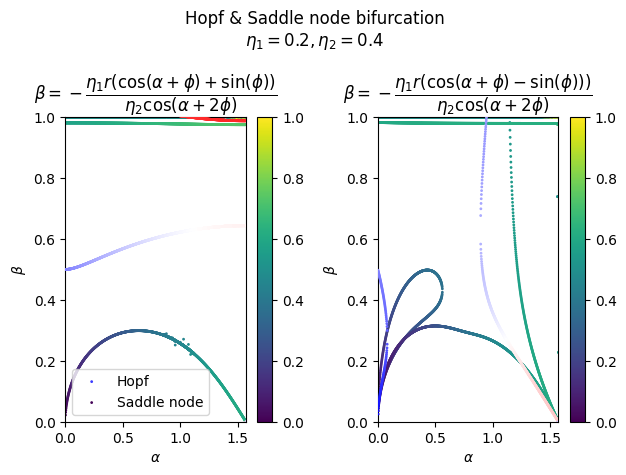

In [432]:
plt.subplot(121)

plt.scatter(alpha_s_trace_p,beta_s_trace_p,s=1,c=R_s_trace_p,vmin=0,vmax=1,cmap='bwr',zorder=5,label='Hopf')
plt.scatter(alpha_s_trace_m,beta_s_trace_m,s=1,c=R_s_trace_m,vmin=0,vmax=1,cmap='bwr',zorder=5)

# plt.scatter(alpha_s_00P,beta_s_00P,s=1,c=R_s_00P,vmin=0,vmax=1,cmap='cool',zorder=3,label='0')
# plt.scatter(alpha_s_00M,beta_s_00M,s=1,c=R_s_00M,vmin=0,vmax=1,cmap='cool',zorder=3)
plt.scatter(alpha_s_pp,beta_s_pp,s=1,c=R_s_pp,vmin=0,vmax=1,label='Saddle node')
plt.scatter(alpha_s_pm,beta_s_pm,s=1,c=R_s_pm,vmin=0,vmax=1)
plt.scatter(alpha_s_mp,beta_s_mp,s=1,c=R_s_mp,vmin=0,vmax=1)
plt.scatter(alpha_s_mm,beta_s_mm,s=1,c=R_s_mm,vmin=0,vmax=1)
plt.legend()

plt.colorbar()
plt.ylim(0,1)
plt.xlim(0,np.pi/2)
plt.ylabel(r'$\beta$')
plt.xlabel(r'$\alpha$')
plt.title(r'$\beta=-\dfrac{\eta_1r(\cos(\alpha+\phi)+\sin(\phi))}{\eta_2\cos(\alpha+2\phi)}$')

plt.subplot(122)
plt.scatter(alpha_ms_trace_p,beta_ms_trace_p,s=1,c=R_ms_trace_p,vmin=0,vmax=1,cmap='bwr',zorder=5)
plt.scatter(alpha_ms_trace_m,beta_ms_trace_m,s=1,c=R_ms_trace_m,vmin=0,vmax=1,cmap='bwr',zorder=5)

# plt.scatter(alpha_sm_00P,beta_sm_00P,s=1,c=R_sm_00P,vmin=0,vmax=1,cmap='cool',zorder=3)
# plt.scatter(alpha_sm_00M,beta_sm_00M,s=1,c=R_sm_00M,vmin=0,vmax=1,cmap='cool',zorder=3)

plt.scatter(alpha_sm_pp,beta_sm_pp,s=1,c=R_sm_pp,vmin=0,vmax=1)
plt.scatter(alpha_sm_pm,beta_sm_pm,s=1,c=R_sm_pm,vmin=0,vmax=1)
plt.scatter(alpha_sm_mp,beta_sm_mp,s=1,c=R_sm_mp,vmin=0,vmax=1)
plt.scatter(alpha_sm_mm,beta_sm_mm,s=1,c=R_sm_mm,vmin=0,vmax=1)

plt.colorbar()
# plt.ylim(0,1)
plt.ylim(0,1)

plt.xlim(0,np.pi/2)
plt.ylabel(r'$\beta$')
plt.xlabel(r'$\alpha$')
plt.title(r'$\beta=-\dfrac{\eta_1r(\cos(\alpha+\phi)-\sin(\phi)))}{\eta_2\cos(\alpha+2\phi)}$')

# plt.title()
plt.suptitle('Hopf & Saddle node bifurcation\n'+rf'$\eta_1 = {eta1},\eta_2={eta2}$')
plt.tight_layout()

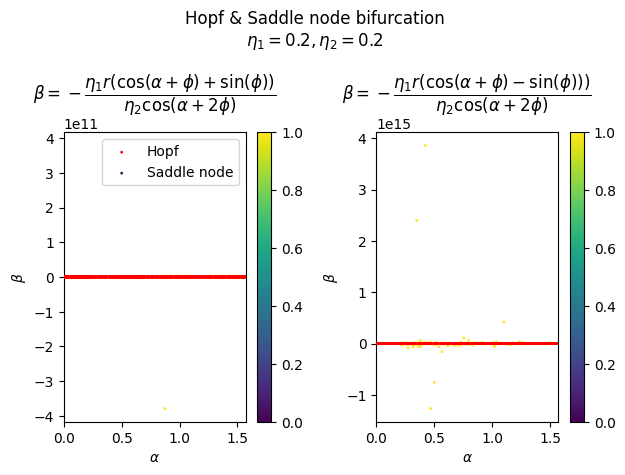

In [427]:
plt.subplot(121)

plt.scatter(alpha_s_trace_p,beta_s_trace_p,s=1,c=R_s_trace_p,vmin=0,vmax=1,cmap='bwr',zorder=5,label='Hopf')
plt.scatter(alpha_s_trace_m,beta_s_trace_m,s=1,c=R_s_trace_m,vmin=0,vmax=1,cmap='bwr',zorder=5)

# plt.scatter(alpha_s_00P,beta_s_00P,s=1,c=R_s_00P,vmin=0,vmax=1,cmap='cool',zorder=3,label='0')
# plt.scatter(alpha_s_00M,beta_s_00M,s=1,c=R_s_00M,vmin=0,vmax=1,cmap='cool',zorder=3)
plt.scatter(alpha_s_pp,beta_s_pp,s=1,c=R_s_pp,vmin=0,vmax=1,label='Saddle node')
plt.scatter(alpha_s_pm,beta_s_pm,s=1,c=R_s_pm,vmin=0,vmax=1)
plt.scatter(alpha_s_mp,beta_s_mp,s=1,c=R_s_mp,vmin=0,vmax=1)
plt.scatter(alpha_s_mm,beta_s_mm,s=1,c=R_s_mm,vmin=0,vmax=1)
plt.legend()

plt.colorbar()
# plt.ylim(0,1)
plt.xlim(0,np.pi/2)
plt.ylabel(r'$\beta$')
plt.xlabel(r'$\alpha$')
plt.title(r'$\beta=-\dfrac{\eta_1r(\cos(\alpha+\phi)+\sin(\phi))}{\eta_2\cos(\alpha+2\phi)}$')

plt.subplot(122)
plt.scatter(alpha_ms_trace_p,beta_ms_trace_p,s=1,c=R_ms_trace_p,vmin=0,vmax=1,cmap='bwr',zorder=5)
plt.scatter(alpha_ms_trace_m,beta_ms_trace_m,s=1,c=R_ms_trace_m,vmin=0,vmax=1,cmap='bwr',zorder=5)

# plt.scatter(alpha_sm_00P,beta_sm_00P,s=1,c=R_sm_00P,vmin=0,vmax=1,cmap='cool',zorder=3)
# plt.scatter(alpha_sm_00M,beta_sm_00M,s=1,c=R_sm_00M,vmin=0,vmax=1,cmap='cool',zorder=3)

plt.scatter(alpha_sm_pp,beta_sm_pp,s=1,c=R_sm_pp,vmin=0,vmax=1)
plt.scatter(alpha_sm_pm,beta_sm_pm,s=1,c=R_sm_pm,vmin=0,vmax=1)
plt.scatter(alpha_sm_mp,beta_sm_mp,s=1,c=R_sm_mp,vmin=0,vmax=1)
plt.scatter(alpha_sm_mm,beta_sm_mm,s=1,c=R_sm_mm,vmin=0,vmax=1)

plt.colorbar()
# plt.ylim(0,1)
# plt.ylim(0,1)

plt.xlim(0,np.pi/2)
plt.ylabel(r'$\beta$')
plt.xlabel(r'$\alpha$')
plt.title(r'$\beta=-\dfrac{\eta_1r(\cos(\alpha+\phi)-\sin(\phi)))}{\eta_2\cos(\alpha+2\phi)}$')

# plt.title()
plt.suptitle('Hopf & Saddle node bifurcation\n'+rf'$\eta_1 = {eta1},\eta_2={eta2}$')
plt.tight_layout()

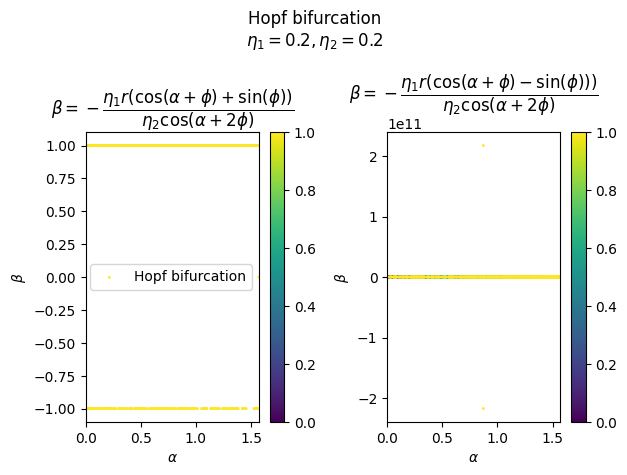

In [428]:
plt.subplot(121)

plt.scatter(alpha_s_trace_p,beta_s_trace_p,s=1,c=R_s_trace_p,vmin=0,vmax=1,label='Hopf bifurcation')
plt.scatter(alpha_s_trace_m,beta_s_trace_m,s=1,c=R_s_trace_m,vmin=0,vmax=1)

plt.legend()

plt.colorbar()
# plt.ylim(0,1)
plt.xlim(0,np.pi/2)
plt.ylabel(r'$\beta$')
plt.xlabel(r'$\alpha$')
plt.title(r'$\beta=-\dfrac{\eta_1r(\cos(\alpha+\phi)+\sin(\phi))}{\eta_2\cos(\alpha+2\phi)}$')

plt.subplot(122)
plt.scatter(alpha_ms_trace_p,beta_ms_trace_p,s=1,c=R_ms_trace_p,vmin=0,vmax=1)
plt.scatter(alpha_ms_trace_m,beta_ms_trace_m,s=1,c=R_ms_trace_m,vmin=0,vmax=1)


plt.colorbar()
# plt.ylim(0,1)
plt.xlim(0,np.pi/2)
plt.ylabel(r'$\beta$')
plt.xlabel(r'$\alpha$')
plt.title(r'$\beta=-\dfrac{\eta_1r(\cos(\alpha+\phi)-\sin(\phi)))}{\eta_2\cos(\alpha+2\phi)}$')

# plt.title()
plt.suptitle('Hopf bifurcation\n'+rf'$\eta_1 = {eta1},\eta_2={eta2}$')
plt.tight_layout()

In [366]:
phi[np.where(np.sign(Zpp[1:] * Zpp[:-1])==-1)]


array([], dtype=float64)

In [289]:
phi = np.linspace(0,2*np.pi,1000)
eta1 = 0.1
eta2 = 0.1
alpha = 0.1

ValueError: x and y must have same first dimension, but have shapes (2000,) and (1000,)

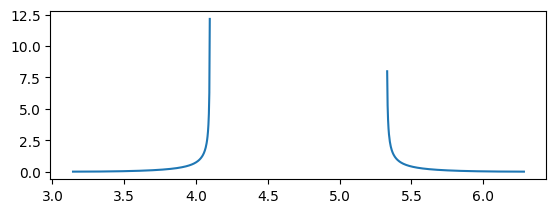

In [288]:
plt.subplot(211)
plt.plot(phi,Zpp)
plt.plot(phi,Zpm)
plt.plot(phi,Zmp)
plt.plot(phi,Zmm)
plt.ylim(-1e-2,1e-2)
plt.subplot(211)
plt.subplot(212)
# plt.plot(phi,beta_pp)
plt.plot(phi,beta_pm)
# plt.plot(phi,beta_mp)
# plt.plot(phi,beta_mm)
plt.ylim(0,1)

/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2394010678.py:14: RuntimeWarning: invalid value encountered in sqrt
  R1 = np.sqrt((-EP + R_sign*np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2394010678.py:58: RuntimeWarning: invalid value encountered in sqrt
  r = B1**2*np.sqrt(n/d)


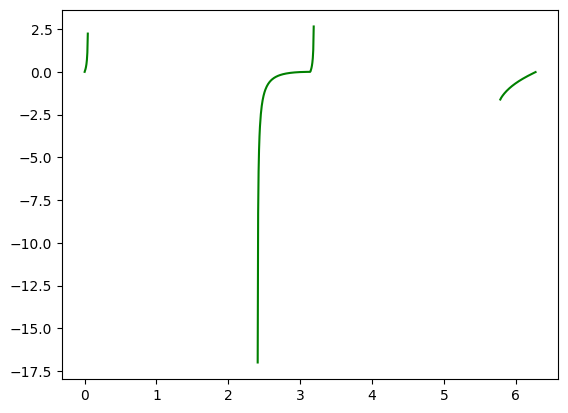

In [295]:
plt.plot(phi,get_R_phi0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=-1)-get_R_Trace0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=-1),color='green')

/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2394010678.py:49: RuntimeWarning: divide by zero encountered in divide
  R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2394010678.py:49: RuntimeWarning: invalid value encountered in sqrt
  R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2394010678.py:49: RuntimeWarning: invalid value encountered in add
  R1_DET = np.sqrt(-B_Delta/A_Delta +R_sign * np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2394010678.py:14: RuntimeWarning: invalid value encountered in sqrt
  R1 = np.sqrt((-EP + R_sign*np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_76042/2394010678.py:58: RuntimeWarning: invalid value encoun

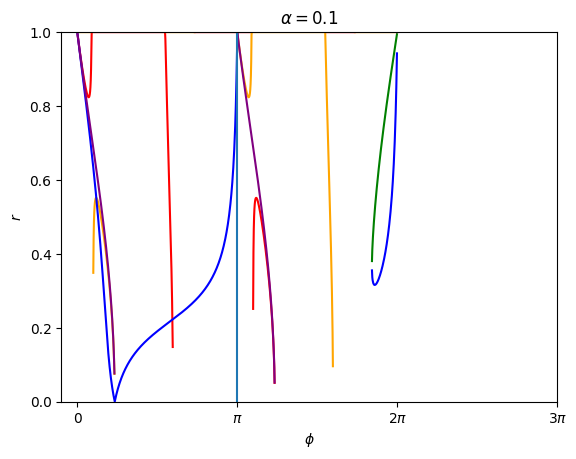

In [292]:
plt.plot(phi,get_R_Det0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=1),color='red')
plt.plot(phi,get_R_Det0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=-1),color='orange')

plt.plot(phi,get_R_phi0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=1),color='blue')
plt.plot(phi,get_R_phi0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=-1),color='green')
plt.plot(phi,get_R_Trace0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=-1),color='purple')

plt.ylim(0,1)
# plt.plot(phi,np.sqrt(R1))
plt.xticks([0,np.pi,np.pi*2,np.pi*3],['0',r'$\pi$',r'$2\pi$',r'$3\pi$'])
plt.ylabel(r'$r$')
plt.xlabel(r'$\phi$')
plt.title(rf'$\alpha={alpha}$')
plt.axvline(np.pi)
# plt.axhline(r)

<lambdifygenerated-1>:3: RuntimeWarning: divide by zero encountered in divide
  return sqrt(sqrt(-(-2*eta1**2*(sin(phi) + cos(alpha + phi))**3*cos(alpha + 2*phi)**2/eta2**2 - 8*eta1**2*(sin(phi) + cos(alpha + phi))**2*sin(alpha - phi)*sin(alpha + 2*phi)*cos(alpha + 2*phi)/eta2**2 + 4*eta1**2*(sin(phi) + cos(alpha + phi))**2*sin(alpha + phi)*sin(alpha + 2*phi)*cos(alpha + 2*phi)/eta2**2 + 4*eta1**2*(sin(phi) + cos(alpha + phi))**2*cos(alpha - phi)*cos(alpha + 2*phi)**2/eta2**2 + 10*eta1**2*(sin(phi) + cos(alpha + phi))**2*cos(alpha + phi)*cos(alpha + 2*phi)**2/eta2**2 - 4*eta1**2*(sin(phi) + cos(alpha + phi))*sin(alpha)*sin(alpha + 2*phi)*cos(alpha + 2*phi)**2/eta2**2 + 8*eta1**2*(sin(phi) + cos(alpha + phi))*sin(alpha - phi)*sin(alpha + phi)*cos(alpha + 2*phi)**2/eta2**2 - 4*eta1**2*(sin(phi) + cos(alpha + phi))*sin(alpha + phi)**2*cos(alpha + 2*phi)**2/eta2**2 - 6*eta1**2*(sin(phi) + cos(alpha + phi))*cos(alpha)*cos(alpha + 2*phi)**3/eta2**2 - 16*eta1**2*(sin(phi) + cos(alpha + phi))*

(-0.01, 0.01)

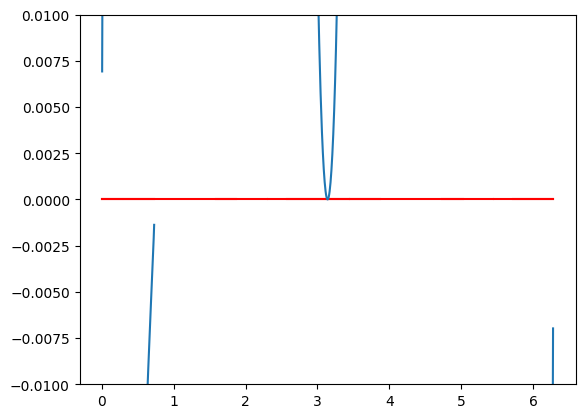

In [294]:
plt.plot(phi,F_DET_RP(phi,(alpha,eta1,eta2))-get_R_Det0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=1),color='red')
plt.plot(phi,F_DET_RM(phi,(alpha,eta1,eta2))-get_R_Det0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=-1),color='red')
plt.plot(phi,F_DET_RM(phi,(alpha,eta1,eta2))-get_R_Trace0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=-1),)
plt.ylim(-1e-2,1e-2)
# plt.plot(phi,get_R_Det0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=1))
# plt.plot(phi,get_R_Det0(phi,alpha,eta1,eta2,APM=APM,sign=1,R_sign=-1))

In [ ]:



B = eta1/eta2
# Apm = np.cos(alpha+phi) + (np.sin(phi))
SA = np.sin(alpha)
CA = np.cos(alpha)
SA_P1P = np.sin(alpha + phi)
SA_P2P = np.sin(alpha +2*phi)
CA_P1P = np.cos(alpha + phi)
CA_P2P = np.cos(alpha +2*phi)
SA_M1P = np.sin(alpha -phi)
SA_M2P = np.sin(alpha -2*phi)
CA_M1P = np.cos(alpha -phi)
CA_M2P = np.cos(alpha -2*phi)

A_DDA3 = 4*B**2*SA_P2P**2 + 6*B**2*CA_P2P**2 - 8*SA_M2P*SA_P2P + 12*CA_M2P*CA_P2P
A_DDA2 = -16*B**2*SA_P1P*SA_P2P*CA_P2P - 22*B**2*CA_P1P*CA_P2P**2 + 8*SA_M2P*SA_P1P*CA_P2P - 32*CA_M2P*CA_P1P*CA_P2P
A_DDA1 = 8*B**2*SA*SA_P2P*CA_P2P**2 + 12*B**2*SA_P1P**2*CA_P2P**2 + 10*B**2*CA*CA_P2P**3 + 16*B**2*CA_P1P**2*CA_P2P**2 + 20*CA*CA_M2P*CA_P2P**2
A_DD0 = B**2*(-8*SA*SA_P1P*CA_P2P**3 - 10*CA*CA_P1P*CA_P2P**3)
B_DDA3 = B**2*(-SA_P2P**2 + CA_P2P**2) + 2*SA_M2P*SA_P2P - CA_M2P*CA_P2P
B_DDA2 = B**2*(2*SA_M1P*SA_P2P*CA_P2P + 3*SA_P1P*SA_P2P*CA_P2P - 3*CA_M1P*CA_P2P**2 - 3*CA_P1P*CA_P2P**2) - 2*SA_M2P*SA_P1P*CA_P2P + 4*CA_M2P*CA_P1P*CA_P2P
B_DDA1 = B**2*(-SA*SA_P2P*CA_P2P**2 - 2*SA_M1P*SA_P1P*CA_P2P**2 - 2*SA_P1P**2*CA_P2P**2 + CA*CA_P2P**3 + 8*CA_M1P*CA_P1P*CA_P2P**2 + 2*CA_P1P**2*CA_P2P**2) - 3*CA*CA_M2P*CA_P2P**2
B_DD0 = B**2*(SA*SA_P1P*CA_P2P**3 - 5*CA*CA_M1P*CA_P2P**3 - CA*CA_P1P*CA_P2P**3)
C_DDA3 = -2*CA_P2P**2
C_DDA2 = -8*SA_M1P*SA_P2P*CA_P2P + 4*SA_P1P*SA_P2P*CA_P2P + 4*CA_M1P*CA_P2P**2 + 10*CA_P1P*CA_P2P**2
C_DDA1 = -4*SA*SA_P2P*CA_P2P**2 + 8*SA_M1P*SA_P1P*CA_P2P**2 - 4*SA_P1P**2*CA_P2P**2 - 6*CA*CA_P2P**3 - 16*CA_M1P*CA_P1P*CA_P2P**2 - 8*CA_P1P**2*CA_P2P**2
C_DD0 = 4*SA*SA_P1P*CA_P2P**3 + 12*CA*CA_M1P*CA_P2P**3 + 6*CA*CA_P1P*CA_P2P**3
A_Delta = A_DD0 + A_DDA3*Apm**3 + A_DDA2*Apm**2 + A_DDA1*Apm
B_Delta = (B_DD0 + B_DDA3*Apm**3 + B_DDA2*Apm**2 + B_DDA1*Apm)*2
C_Delta = (C_DD0 + C_DDA3*Apm**3 + C_DDA2*Apm**2 + C_DDA1*Apm)*B**2

R1_DET = np.sqrt(-B_Delta/A_Delta + np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)
R2_DET = np.sqrt(-B_Delta/A_Delta - np.sqrt(-A_Delta*C_Delta + B_Delta**2)/A_Delta)


In [ ]:
# plt.plot(phi,np.sqrt(R2))
# plt.plot(phi,np.sqrt(R1))

plt.plot(phi,R1_DET - np.sqrt(R1))
plt.plot(phi,R2_DET - np.sqrt(R1))

plt.plot(phi,R1_DET - np.sqrt(R2))
plt.plot(phi,R2_DET - np.sqrt(R2))


plt.xticks([0,np.pi,np.pi*2,np.pi*3],['0',r'$\pi$',r'$2\pi$',r'$3\pi$'])
plt.ylabel(r'$r$')
plt.xlabel(r'$\phi$')
plt.title(rf'$\alpha={alpha}$')
# plt.axvline(np.pi)
plt.ylim(-0.1,1)
plt.axhline(0)
# plt.axvline(np.pi/2)
# plt.axvline(np.pi/2)
# plt.axhline(r)